In [2]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [3]:
data = np.loadtxt("C:/Users/kateh/OneDrive/Documents/GitHub/BP24/Kate/Testing/kate_uniform_small_d_1.tex")

# Creating NumPy array
array = np.array(data)

# Converting to Pandas DataFrame
df_table = pd.DataFrame(array)

# Displaying the table
print(df_table)

          0         1         2         3         4         5         6    \
0    1.729682  1.455381  1.830019  1.948706  1.447929  1.751523  1.916420   
1    1.864188  1.009713  1.984120  1.322600  1.127699  1.011174  1.919314   
2    0.553208  0.476697  0.050871  0.194960  0.227320  0.823017  0.718030   
3    0.237393  0.701204  0.774880  0.367677  0.189223  0.032425  0.727351   
4    1.563103  1.099648  1.313649  1.228852  1.223746  1.201893  1.306305   
..        ...       ...       ...       ...       ...       ...       ...   
495  1.762152  1.379364  1.531832  1.483616  1.248098  1.683573  1.070170   
496  0.178252  0.562607  0.815799  0.580652  0.331205  0.698219  0.081662   
497  0.521598  0.810117  0.557975  0.305243  0.497838  0.052495  0.166065   
498  1.124446  1.835594  1.559563  1.487250  1.668361  1.556483  1.676739   
499  1.072918  1.780573  1.654537  1.485739  1.282604  1.099706  1.959227   

          7         8         9    ...       141       142       143  \
0  

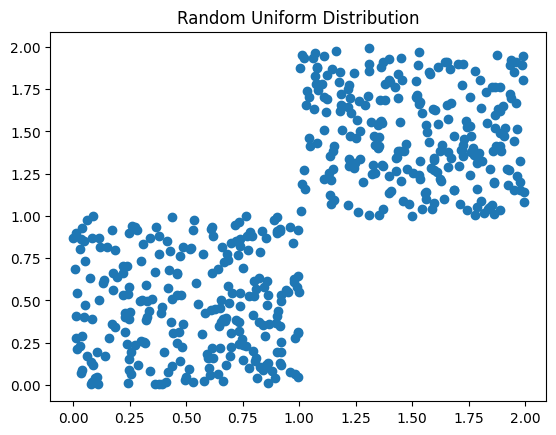

In [4]:
fig, ax = plt.subplots()
plt.scatter(df_table[0], df_table[1])
plt.title("Random Uniform Distribution")
plt.show()

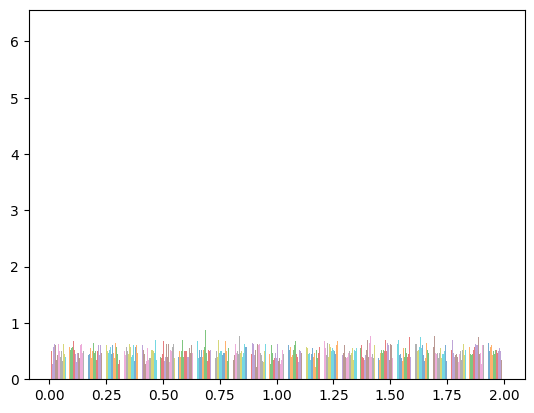

In [5]:
plt.hist(df_table, bins=25, density=True, alpha=0.6)
plt.show()

In [10]:
# print the correlation matrix of the dataframe
print(df_table.corr(method='pearson'))

          0         1         2         3         4         5         6    \
0    1.000000  0.727122  0.739527  0.755293  0.733756  0.719040  0.748020   
1    0.727122  1.000000  0.755274  0.742141  0.756070  0.731409  0.759304   
2    0.739527  0.755274  1.000000  0.747005  0.741640  0.750067  0.737586   
3    0.755293  0.742141  0.747005  1.000000  0.753106  0.745607  0.772047   
4    0.733756  0.756070  0.741640  0.753106  1.000000  0.770812  0.741468   
..        ...       ...       ...       ...       ...       ...       ...   
146  0.751845  0.750054  0.760386  0.748251  0.767924  0.749617  0.757085   
147  0.757816  0.755457  0.743806  0.758194  0.756480  0.723500  0.746209   
148  0.758885  0.750018  0.735455  0.746841  0.724928  0.730763  0.729283   
149  0.766006  0.779393  0.750991  0.766413  0.750555  0.731242  0.750360   
150  0.860145  0.868502  0.867421  0.867563  0.870265  0.859517  0.860003   

          7         8         9    ...       141       142       143  \
0  

In [6]:
df_chi = df_table.round(0)

In [7]:
# Import relevant libraries 
import scipy.stats as stats

# Number of features, excluding label (Your label should be your LAST column)
var_count = len(df_chi.columns) - 1

# Empty list
out = []

for i in range(0, var_count):

    # Create contigency table
    crosstab = pd.crosstab(df_chi.iloc[:, i], df_chi.iloc[:, -1]) # -1 is last column
    
    # Passing contingency table into chi-squared test
    result = stats.chi2_contingency(crosstab)
    print(result)

Chi2ContingencyResult(statistic=249.67330677290838, pvalue=6.083174784618606e-55, dof=2, expected_freq=array([[ 59. ,  59. ],
       [125.5, 125.5],
       [ 65.5,  65.5]]))
Chi2ContingencyResult(statistic=253.91093117408906, pvalue=7.3104119071538e-56, dof=2, expected_freq=array([[ 67. ,  67. ],
       [123.5, 123.5],
       [ 59.5,  59.5]]))
Chi2ContingencyResult(statistic=256.0163934426229, pvalue=2.5512118621926874e-56, dof=2, expected_freq=array([[ 64.5,  64.5],
       [122. , 122. ],
       [ 63.5,  63.5]]))
Chi2ContingencyResult(statistic=241.65250965250965, pvalue=3.356017833242855e-53, dof=2, expected_freq=array([[ 63.5,  63.5],
       [129.5, 129.5],
       [ 57. ,  57. ]]))
Chi2ContingencyResult(statistic=257.201646090535, pvalue=1.4104970533827387e-56, dof=2, expected_freq=array([[ 66. ,  66. ],
       [121.5, 121.5],
       [ 62.5,  62.5]]))
Chi2ContingencyResult(statistic=250.0, pvalue=5.166420632837831e-55, dof=2, expected_freq=array([[ 62.5,  62.5],
       [125. , 125. 

In [19]:
# Standardize the sample you will use
# This transforms the sample data to have a mean of 0 and a standard deviation of 1.
def standardize(sample):
    return (sample - np.mean(sample)) / np.std(sample)
    
# Kolmogorov-Smirnov test function
def ks_test(sample):
    # Sort the sample
    sample_sorted = np.sort(sample)
    # Evaluate the empirical CDF (ECDF)
    ecdf = np.arange(1, len(sample_sorted)+1) / len(sample_sorted)
    # Evaluate the theoretical CDF
    cdf = stats.norm.cdf(sample_sorted)
    # Calculate the KS statistic
    ks_stat = np.max(np.abs(ecdf - cdf))
    # Calculate the p-value
    p_value = stats.kstest(sample_sorted, 'norm').pvalue
    return ks_stat, p_value

# Select one feature from the dataset (Example: assuming the first column is sepal_length)
sample = df_table.iloc[:, 0]  # Change the column index as needed

# Standardize the sample
standardized_sample = standardize(sample)

# Perform the KS test on standardize sample
ks_stat, p_value = ks_test(standardized_sample)

# Print the result
print(f"KS Test Result for {df_table.columns[0]}: \nks_stat = {ks_stat:.4f}, \np-value = {p_value:.3e}, \nNormal distribution = {p_value > 0.05}")

# This supports or rejects the null hypothesis H0 
# If sample does not come from a normal distribution ---> reject H0
# If sample comes from a normal distribution ---> fail to reject H0
if p_value > 0.05:
    print("Fail to reject H0. Sample comes from the specified distribution")
else:
     print("Reject H0. Sample DOES NOT come from the specified distribution")

KS Test Result for 0: 
ks_stat = 0.0655, 
p-value = 2.008e-02, 
Normal distribution = False
Reject H0. Sample DOES NOT come from the specified distribution


In [8]:
# splitting into training and testing data
X_train, X_test, y_train, y_test = train_test_split(df_table.iloc[:,1:150], df_table.iloc[:,-1], test_size=.2, random_state=52)

In [9]:
# create model instance
# n_estimators: number of trees(estimators) the model uses --> the more used, the more accurate the model is
# max_depth: maximum depth of tree --> higher number makes model more complex, but too high can cause overfitting
# learning_rate: quantifies each tree's contribution to total prediction --> lower number takes longer, but can lead to better generalization
# objective: binary:logistic outputs probabilities. if classification is wanted, use binary:hinge
bst = XGBClassifier(n_estimators=2, max_depth=2, learning_rate=1, objective='binary:logistic')

# fit model with the training data
bst.fit(X_train, y_train)

# make predictions for the test dataset
preds = bst.predict(X_test)

# print predictions
print(preds)

# print model Accuracy (how often the classifier is correct)
print("Accuracy:",metrics.accuracy_score(y_test, preds))

[1 0 0 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 1 0 1 1 1 1 1 0 0 0 1 1 0 0 0 0 0 1
 0 1 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1
 0 0 0 0 1 0 1 0 1 0 1 0 0 1 1 0 1 1 0 1 1 1 1 1 1 1]
Accuracy: 1.0


In [40]:
#Create a svm Classifier
# kernel: options for kernel include linear, poly, rbf, sigmoid
    # linear: use this when data can be split by a linear function
    # poly (polynomial): use this when data can be split by a polynomial function
    # rbf (radial basis function): use this when there are clusters of one class inside another
    # sigmoid: use this when the split between classes is curved and irregular
clf = svm.SVC(kernel='linear')

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# print predictions
print(y_pred)

# print model Accuracy (how often the classifier is correct)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

[1. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1.
 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0.
 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1.
 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1.
 1. 1. 1. 1.]
Accuracy: 1.0


In [10]:
#create a knn classifier
#n_neighbors: predicting the label of the data point by looking at the 3 closest data points and getting them to "vote"
#algorithm: we may need to look at this if it misbehaves
neigh = KNeighborsClassifier(n_neighbors=5)

#train the model using the training sets
neigh.fit(X_train, y_train)

#predict the response for the test dataset
y_pred = neigh.predict(X_test)

#print predictions
print(y_pred)

#model accuracy (how often the classifier is correct)
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

[1. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1.
 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0.
 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1.
 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1.
 1. 1. 1. 1.]
Accuracy: 1.0


In [31]:
class FeatureClassifier:
  def __init__(self,reqAcc=0.01,classifier='DesicionTree',bias=[],control=None,n_jobs=None,random_state=None):
    self.featureClassifiers=[] #list of all the classifiers of all the selected features
    self.reqAcc=reqAcc #user specified cutoff value
    self.indexLs=[] # list of mapped index values to featureClassifiers
    self.flag=0
    self.bias=bias # list of biases for each and every label
    self.control=control #overfitting control for decision trees
    self.classifier=classifier #the classifier which is preferred by the user
    self.dic={'DecisionTree':0,'LinearRegression':1,'SVM':2,'LogisticRegression':3} #a dictionary which maps the classifier to its index
    self.n_jobs=n_jobs
    self.random_state=random_state
    self.num_lables = None

  def finIndex(self):
    #finds the index where the reqAcc condition fails and also created the indexLs[] for mapping
    for i in range(len(self.featureClassifiers)):
      if self.featureClassifiers[i][1] < self.reqAcc:
        return i
      self.indexLs.append(self.featureClassifiers[i][2])
    self.flag=1
    return i

  def fit(self,x,y):
    #applied the model to the dataset. The model is trained and saved for further prediction
    self.num_lables=len(set(y.flatten()))
    bestfeatures = SelectKBest(score_func=chi2,k=1)
    fit = bestfeatures.fit(x,y)
    print(x)
    print(type(x[0])
    print(x[0])
    for i in range(len(x[0])):
      clf=[DecisionTreeClassifier(max_depth=self.control,random_state=self.random_state),LinearRegression(n_jobs=self.n_jobs),SVC(gamma=self.control,random_state=self.random_state), LogisticRegression(penalty=self.control,random_state=self.random_state)][self.dic[self.classifier]]
      X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33,random_state=self.random_state)
      clf.fit(X_train[:,i:i+1],y_train)
      self.featureClassifiers.append((clf,fit.scores_[i],i))
    self.featureClassifiers.sort(key=lambda x:x[1],reverse=True)
    index=self.finIndex()
    if self.flag==0:
      self.featureClassifiers=self.featureClassifiers[:index]
    return

  def predict(self,x):
    #given a list of inputs, predicts the possible outputs
    if not self.bias:
      self.bias=np.zeros(self.num_lables)
    if len(self.bias)<self.num_lables:
      raise AttributeError('Please check the lenth of bias list')
    yPred=[]
    for i in range(len(x)):
      pred_arr=np.zeros(self.num_lables)
      for j in range(len(self.indexLs)):
        pred=np.round(self.featureClassifiers[j][0].predict([[x[i][self.indexLs[j]]]]))
        pred_arr[pred]+=self.featureClassifiers[j][1]+self.bias[pred[0]]
      yPred.append(np.argmax(pred_arr))
    return yPred

#train the model using the training sets
clf1=FeatureClassifier(0,classifier='DecisionTree',control=3)
# clf1.fit(X_train,y_train.reshape(-1,1))
clf1.fit(np.array(X_train), np.array(y_train)[:,np.newaxis])

#predict the response for the test dataset
#model accuracy (how often the classifier is correct)
print("Accuracy:",metrics.accuracy_score(y_test,clf1.predict(X_test)))

print(clf1.indexLs)
clf1.featureClassifiers

[[1.9684315  1.14294788 1.25151917 ... 1.07680387 1.01317562 1.22259214]
 [0.65993086 0.88192183 0.6791445  ... 0.82472038 0.55753667 0.5871657 ]
 [1.30086015 1.04208099 1.98182091 ... 1.84006288 1.79615113 1.29288667]
 ...
 [1.02035419 1.3473645  1.69909218 ... 1.88781831 1.20236793 1.59613608]
 [1.4400848  1.62845395 1.68680938 ... 1.31676482 1.41378677 1.6148753 ]
 [0.43484376 0.82274009 0.91793964 ... 0.50568058 0.34169007 0.07287956]]
  
[1.9684315  1.14294788 1.25151917 1.97654884 1.6137507  1.80523102
 1.23558678 1.0547394  1.71357501 1.25804946 1.64719502 1.56181947
 1.71459221 1.13867835 1.67830954 1.26296852 1.01489477 1.86385096
 1.70535678 1.57083726 1.20159513 1.45881316 1.30911619 1.15728758
 1.88051867 1.06675576 1.06611485 1.98464975 1.92443337 1.5687114
 1.08344057 1.96613884 1.72292738 1.52519143 1.69620342 1.58630768
 1.16133963 1.19188412 1.770188   1.01386897 1.14219841 1.7771349
 1.18386822 1.88902367 1.34948981 1.93663416 1.94657926 1.87812654
 1.61774476 1.70907

KeyError: 0

In [26]:
print(np.array(y_train)[:,np.newaxis].shape)

(400, 1)


In [28]:
print(X_train.shape)

(400, 149)
